## Install OPEN3D

```python
pip install open3d-python
```

In [1]:
from open3d import *
import numpy as np
import matplotlib.pyplot as plt
import glob
from skimage import io
from scipy.misc import imsave
import cv2

# Normal Visualization

RGBDImage of size 
Color image : 640x480, with 3 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


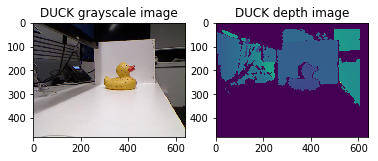

In [2]:
extrinsics = [[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]]
color_raw = read_image("../data/color/0.jpg")
depth_raw = read_image("../data/depth/0.png")
rgbd_image = create_rgbd_image_from_color_and_depth(
    color_raw, depth_raw, convert_rgb_to_intensity = False)
print(rgbd_image)
plt.subplot(1, 2, 1)
plt.title('DUCK grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('DUCK depth image')
plt.imshow(rgbd_image.depth)
plt.show()
pcd = create_point_cloud_from_rgbd_image(rgbd_image, PinholeCameraIntrinsic(
        PinholeCameraIntrinsicParameters.PrimeSenseDefault))
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])

In [3]:
estimate_normals(pcd, search_param = KDTreeSearchParamHybrid(
        radius = 0.1, max_nn = 30))
draw_geometries([pcd])

## Using FLANN 

In [16]:
#change point cloud color for visualization
pcd.paint_uniform_color([0.5, 0.5, 0.5])
pcd.colors[1500] = [1, 0, 0]
# Creates KD tree
pcd_tree = KDTreeFlann(pcd)

# k - number of neighbours
# idx - indices
# i - distances
[k, idx, i] = pcd_tree.search_knn_vector_3d(pcd.points[1500], 200)
#     [k, idx, i] = pcd_tree.search_radius_vector_3d(pcd.points[1500], 0.2)
np.asarray(pcd.colors)[idx[1:], :] = [0, 0, 1]
draw_geometries([pcd])

## Converting Point Cloud to Mesh

In [75]:
volume = ScalableTSDFVolume(voxel_length = 4.0 / 512.0,
        sdf_trunc = 0.04, color_type = TSDFVolumeColorType.RGB8)
rgbd = create_rgbd_image_from_color_and_depth(color_raw, depth_raw,
        depth_trunc = 4.0, convert_rgb_to_intensity = False)
volume.integrate(rgbd, PinholeCameraIntrinsic(PinholeCameraIntrinsicParameters.PrimeSenseDefault), extrinsics)
mesh = volume.extract_triangle_mesh();

In [70]:
draw_geometries([mesh, ])